# Actividad en clases

In [1]:
# Basaado en: http://www.science.smith.edu/~jcrouser/SDS293/labs/lab10-py.html

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

## 1. Cargar los datos del dataset "Hitters"
_____
1. Descarge los datos desde: https://www.kaggle.com/datasets/floser/hitters
2. Use pandas para cargar los datos en un dataframe
3. Elimine las filas que tengas datos no definidos (NaN)
4. Muestre el dataframe

In [2]:
df = pd.read_csv('../data/Hitters.csv').dropna()

df

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N
5,-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,...,501,336,194,A,W,282,421,25,750.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,-Willie McGee,497,127,7,65,48,37,5,2703,806,...,379,311,138,N,E,325,9,3,700.0,N
318,-Willie Randolph,492,136,5,76,50,94,12,5511,1511,...,897,451,875,A,E,313,381,20,875.0,A
319,-Wayne Tolleson,475,126,3,61,43,52,6,1700,433,...,217,93,146,A,W,37,113,7,385.0,A
320,-Willie Upshaw,573,144,9,85,60,78,8,3198,857,...,470,420,332,A,E,1314,131,12,960.0,A


## 2. Crear y visualizar histogramas de X e y
-----
1. Eliminar del dataframe las variables que no son numéricas, usando df.drop([col1, col2, ...], axis=1).astype('float64') y dejar dataframe en la variable X
2. Crear y tomando la variable Salary
2. Generar histogramas de X e y

In [4]:
# Drop the column with the independent variable (Salary), and columns for which we created dummy variables
X = df.drop(['Salary','Unnamed: 0','League', 'Division', 'NewLeague'], axis = 1).astype('float64')

# Define the feature set X.
X

y = df.Salary
y

1       475.0
2       480.0
3       500.0
4        91.5
5       750.0
        ...  
317     700.0
318     875.0
319     385.0
320     960.0
321    1000.0
Name: Salary, Length: 263, dtype: float64

<ipython-input-7-cb5c69a24f19>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  X.hist(ax = ax)


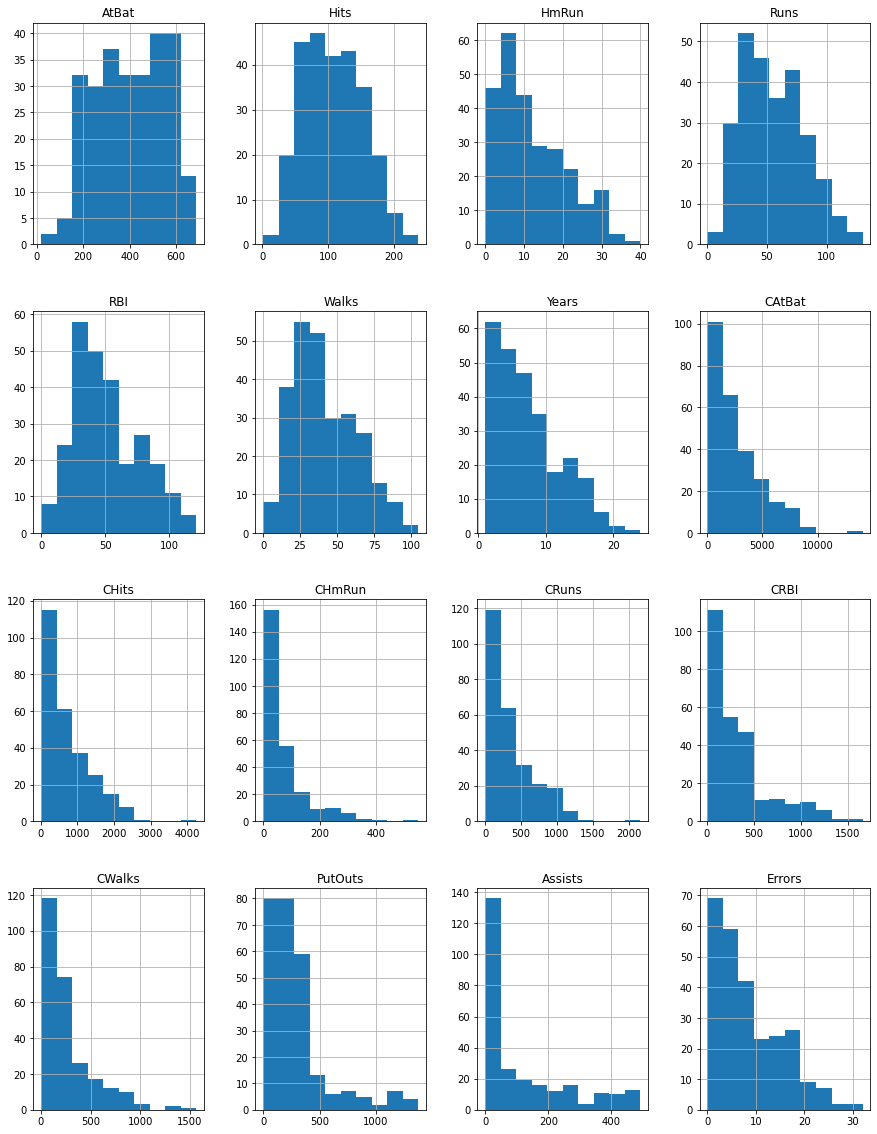

In [7]:
fig = plt.figure(figsize = (15,20))   
ax = fig.gca()
X.hist(ax = ax)
plt.show()

<AxesSubplot:ylabel='Frequency'>

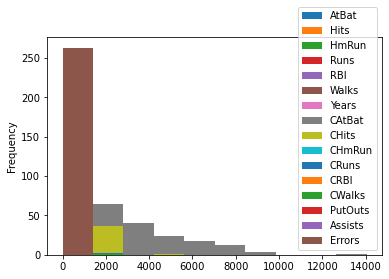

In [8]:
X.plot.hist()

## 3. Centrar los datos para que tengan promedio cero
-----
1. Usar StandardScaler()
2. Mostrar nuevamente los histogramas de los datos escalados

4.094738912115596e-17 1.4859258732625668e-16


<ipython-input-9-0fdf0d1052c7>:15: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df_s.hist(ax = ax)


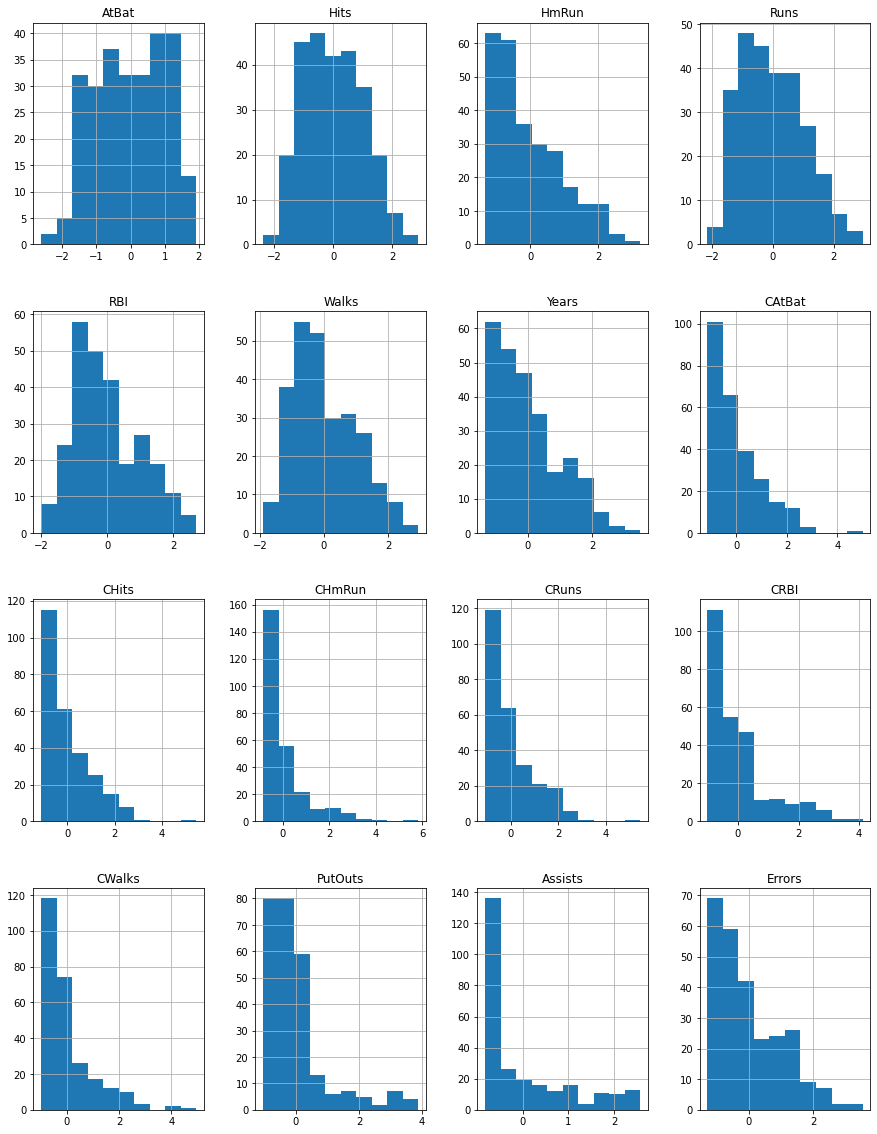

In [9]:
scaler = StandardScaler()
X_ = scaler.fit_transform(X)

scaler2 = StandardScaler()
y_ = scaler2.fit_transform(y.values.reshape(-1,1))


print(X_.mean(), y_.mean())


df_s = pd.DataFrame(X_, columns = X.columns)

fig = plt.figure(figsize = (15,20))   
ax = fig.gca()
df_s.hist(ax = ax)
plt.show()

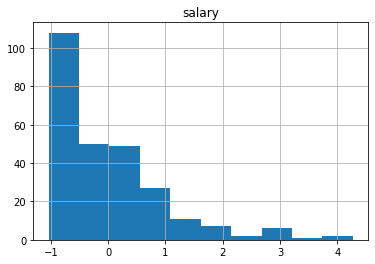

In [6]:
salary_s = pd.DataFrame(y_, columns = ['salary'])
fig = plt.figure()   
ax = fig.gca()
salary_s.hist(ax = ax)
plt.show()

## 4. Generar un conjunto de valores de $\lambda$, parámetro de penalización 
-----
1. Generar un arreglo numpy con 100 valores (usar código indicado)
2. Gráficar los valores

In [11]:
np.linspace(10,-2,100)

array([10.        ,  9.87878788,  9.75757576,  9.63636364,  9.51515152,
        9.39393939,  9.27272727,  9.15151515,  9.03030303,  8.90909091,
        8.78787879,  8.66666667,  8.54545455,  8.42424242,  8.3030303 ,
        8.18181818,  8.06060606,  7.93939394,  7.81818182,  7.6969697 ,
        7.57575758,  7.45454545,  7.33333333,  7.21212121,  7.09090909,
        6.96969697,  6.84848485,  6.72727273,  6.60606061,  6.48484848,
        6.36363636,  6.24242424,  6.12121212,  6.        ,  5.87878788,
        5.75757576,  5.63636364,  5.51515152,  5.39393939,  5.27272727,
        5.15151515,  5.03030303,  4.90909091,  4.78787879,  4.66666667,
        4.54545455,  4.42424242,  4.3030303 ,  4.18181818,  4.06060606,
        3.93939394,  3.81818182,  3.6969697 ,  3.57575758,  3.45454545,
        3.33333333,  3.21212121,  3.09090909,  2.96969697,  2.84848485,
        2.72727273,  2.60606061,  2.48484848,  2.36363636,  2.24242424,
        2.12121212,  2.        ,  1.87878788,  1.75757576,  1.63

[]

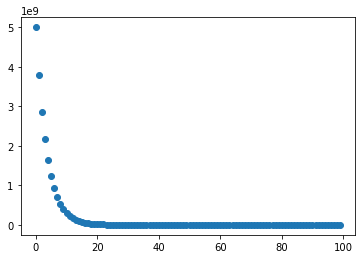

In [12]:
lambdas = 10**np.linspace(10,-2,100)*0.5

plt.figure()
plt.plot(lambdas,'o')
plt.plot()

## 5. Usar el método ridge regression (1)
-----
1. Usar Ridge(), y mediante un ciclo probar cada uno de los valores de lambda.
2. Guardar en la lista llamada coefs, los coeficientes generados. Notar que en el método Ridge() el parámetro de penalización se llama alpha
3. Trabajar con los datos escalados 


In [8]:
y_[:,0].shape

(263,)

In [14]:
ridge = Ridge(fit_intercept=False)
coefs = []

for l in lambdas:
    ridge.set_params(alpha = l)
    ridge.fit(X_, y_[:,0])
    coefs.append(ridge.coef_)
    
np.shape(coefs)

(100, 16)

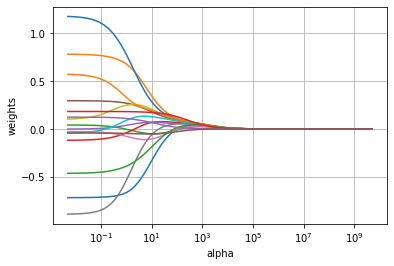

In [15]:
ax = plt.gca()
ax.plot(lambdas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.grid()
plt.show()



## 6. Generar datos de entrenamiento y testing
-----
1. Usar train_test_split() como se indica a continuación

In [16]:
# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X_, y_[:,0], test_size=0.5, random_state=1)

## 7. Usar Ridge Regression (2)
-----
1. Usar alpha= 4, y usar los datos de entrenaiento para ajustar
2. Imprimir por pantalla los coeficientes encontrados
3. Imprimer el error de generalización (mean squared error entre el conjunto de testing y la predicción)

In [18]:
ridge2 = Ridge(alpha = 4, fit_intercept=False)
ridge2.fit(X_train, y_train)             # Se ajusta usando los datos de entrenamieto
pred2 = ridge2.predict(X_test)           # Se usa el modelo para predecir en los datos de testing
print(pd.Series(ridge2.coef_, index = X.columns)) # Imprime los coeficientes
print(mean_squared_error(y_test, pred2))   # Imprime el error en el testing

AtBat     -0.520530
Hits       0.409208
HmRun     -0.136931
Runs       0.006922
RBI        0.240306
Walks      0.182220
Years     -0.096460
CAtBat    -0.250606
CHits      0.201233
CHmRun     0.177235
CRuns      0.240667
CRBI       0.223875
CWalks    -0.061853
PutOuts    0.282407
Assists    0.082111
Errors    -0.030426
dtype: float64
0.5333368172831913


## 8. Usar Ridge Regression (3)
-----
1. Usar alpha muy grande, por ejemplo $\alpha=10^{10}$, y usar los datos de entrenaiento para ajustar
2. Imprimir por pantalla los coeficientes encontrados
3. Imprimer el error de generalización (mean squared error entre el conjunto de testing y la predicción)

In [19]:
ridge3 = Ridge(alpha = 10**10, fit_intercept=False)
ridge3.fit(X_train, y_train)             # Ajusta usando el conjunto de training
pred3 = ridge3.predict(X_test)           # Se usa el modelo para predecir en el conjunto de testing
print(pd.Series(ridge3.coef_, index = X.columns)) # Imprime los coeficientes
print(mean_squared_error(y_test, pred3))          # Calcula el error en el conjunto de testing

AtBat      5.592422e-09
Hits       6.473826e-09
HmRun      4.413864e-09
Runs       5.968558e-09
RBI        7.084223e-09
Walks      6.932685e-09
Years      5.491732e-09
CAtBat     7.235948e-09
CHits      7.731068e-09
CHmRun     8.239903e-09
CRuns      7.719389e-09
CRBI       8.744031e-09
CWalks     6.731754e-09
PutOuts    6.787420e-09
Assists   -9.669131e-11
Errors     3.831105e-10
dtype: float64
0.8525018150955611


## 9. Usar Ridge Regression (4)
-----
1. Usar  $\alpha=0$, y usar los datos de entrenaiento para ajustar
2. Imprimir por pantalla los coeficientes encontrados
3. Imprimer el error de generalización (mean squared error entre el conjunto de testing y la predicción)

In [20]:
ridge4 = Ridge(alpha = 0)
ridge4.fit(X_train, y_train)             #  Ajusta usando el conjunto de training
pred4 = ridge4.predict(X_test)            # Se usa el modelo para predecir en el conjunto de testing
print(pd.Series(ridge4.coef_, index = X.columns)) # Imprime los coeficientes
print(mean_squared_error(y_test, pred4))           # Calcula el error en el conjunto de testing

AtBat     -0.685949
Hits       0.432955
HmRun     -0.145640
Runs      -0.001852
RBI        0.346844
Walks      0.153990
Years      0.044243
CAtBat    -2.889608
CHits      3.043623
CHmRun     0.549774
CRuns      0.215838
CRBI      -0.527019
CWalks     0.117724
PutOuts    0.282894
Assists    0.165651
Errors    -0.070782
dtype: float64
0.5942656310599039


## 10. Usar Lasso
-----
1. Usar Lasso(), y mediante un ciclo probar cada uno de los valores de lambda.
2. Guardar en la lista llamada coefs, los coeficientes generados. Notar que en el método Ridge() el parámetro de penalización se llama alpha

/Users/rpezoa/opt/anaconda3/envs/root_py/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.027086836455957553, tolerance: 0.015046975026625126
  model = cd_fast.enet_coordinate_descent(


Text(0, 0.5, 'weights')

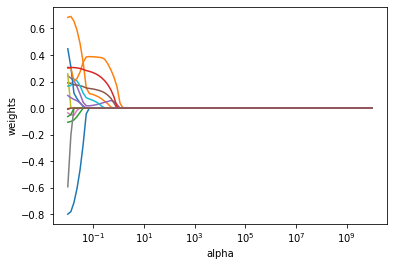

In [21]:
lasso = Lasso(fit_intercept=False)
coefs = []

for l in lambdas:
    lasso.set_params(alpha=l)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(lambdas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [23]:
lasso.co

Lasso(alpha=0.005, fit_intercept=False)

In [24]:
# Some of the coefficients are now reduced to exactly zero.
pd.Series(lasso.coef_, index=X.columns)


AtBat     -0.798083
Hits       0.683520
HmRun     -0.106366
Runs      -0.004416
RBI        0.243559
Walks      0.190109
Years     -0.035480
CAtBat    -0.591770
CHits      0.258731
CHmRun     0.166082
CRuns      0.446755
CRBI       0.299784
CWalks    -0.063645
PutOuts    0.305919
Assists    0.094990
Errors    -0.008966
dtype: float64